In [1]:
from dzdy import *
import matplotlib.pyplot as plt

da = DirectorABM()
da.load_pc('scripts/pBAD.txt')
da.load_dc('scripts/BAD.txt')

bad = da.new_abm('BAD', 'pBAD', 'BAD')
## Key command
bad.add_behaviour('BR', 'LifeRate', s_death='Dead', s_birth='Young', rate=0.2, dt=1)
bad.set_observations(states=['Young', 'Middle', 'Old', 'Dead'], transitions=['Die'])

In [2]:
mm = ABMSet('Set')
y0s = dict()
for i in range(3): 
    abm = da.generate_abm('BAD', 'AFlu{}'.format(i))
    mm.append(abm)
    y0s['AFlu{}'.format(i)] = {'Young': 30, 'Middle': 20, 'Old': 10}

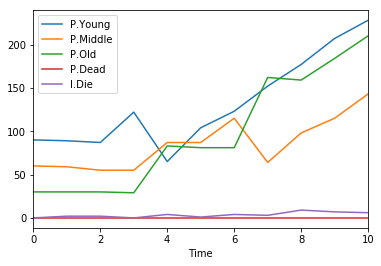

In [3]:
out = simulate(mm, y0s, 0, 10)
out.plot()
plt.show()